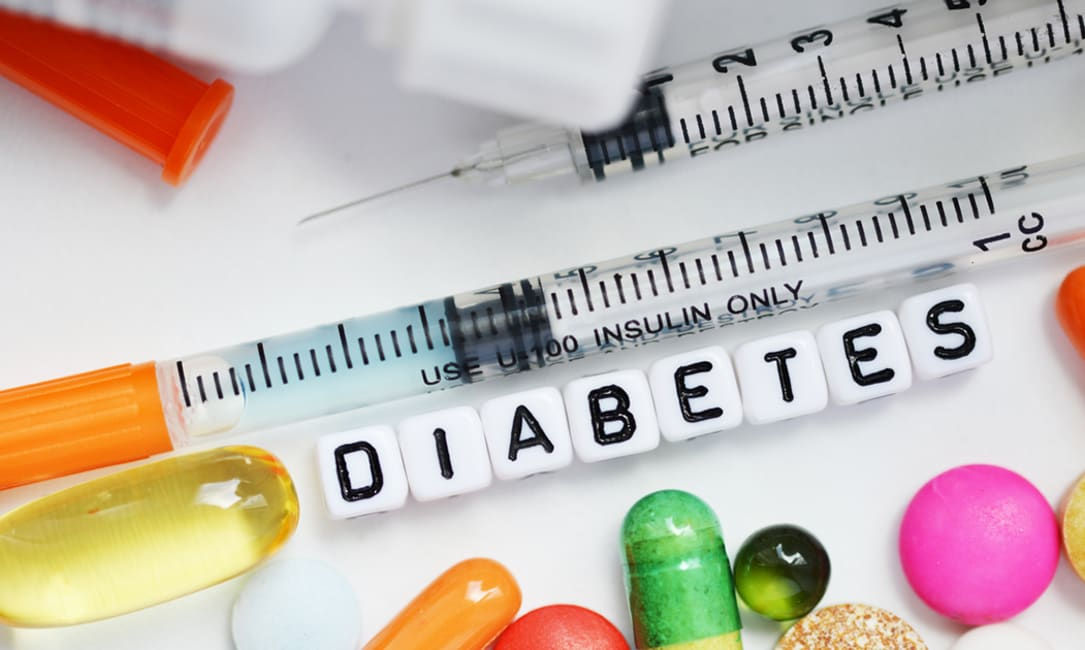

# **What is Diabetes**

Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy. Sometimes your body doesn’t make enough or any insulin or doesn’t use insulin well. Glucose then stays in your blood and doesn’t reach your cells.

# **DataSet Description:**

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skinfold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* Pedigree: Diabetes pedigree function - A function that scores likelihood of diabetes based on family history.
* Age: Age in years
* Class: Class variable (0: the person is not diabetic or 1: the person is diabetic)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Reading and Understanding Data**

In [ ]:
data = pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")

print("The rows and columns of data are", data.shape, "respectively.")

In [ ]:
data.info()


**Observation**
* All variable are either float or integer

In [ ]:
data.describe().T

**Observations:**
* The average number of Pregnancies are 4.
* Glucose, BloodPressure, SkinThickness, and Insulin have minimum values as 0 which seems like an error and should be explore later. 
* Pregnancies, SkinThickness, Insulin and Age have major difference between 3rd quartile and maximum value. This represent the chances of outliers in the data. 


In [ ]:
data.head

# **Exploring Missing Values & Cleaning The Data**

In [ ]:
# valueable information for data cleaning

for col in data.columns:
    print("{} minimum value is {}".format(col, data[col].min()))
    print("{} maximum value is {}".format(col, data[col].max()))
    print("{} mean value is {}".format(col, data[col].mean()))
    print(" ")

In [ ]:
'''The above code shows that we have some 0 values in our data.
# Column like Glucose, BloodPressure, Skinthikness and Insulin must not have 0 values in it.
# Later we will change the values to 0 to mean and medians '''

# First we calculate the percentage of zeros in our data

for col in data.columns[0:8]:
    print("The missing percentage of {} is {} ".format(col, data[data[col] == 0][col].count() /data[col].count()* 100))

In [ ]:
# Replace 0 value with null data

data[["Glucose","BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction"]] = data[["Glucose","BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction"]].replace(0, np.nan)
data.head()

In [ ]:
# plotting the percentage of missing values on graph

plt.figure(figsize = (15, 5))
percentage = (data.isnull().mean()) * 100
percentage.sort_values(ascending = False).plot.bar(color = sns.color_palette("Oranges", 8), edgecolor= "black")
print(percentage.sort_values(ascending=False))
plt.xticks(rotation=45, weight = "bold")
plt.title("Percentage of Missing Values in each columns", weight= "bold")
plt.xlabel('Columns', size=15, weight="bold")
plt.ylabel('Missing values percentage', weight = "bold")
plt.yticks(weight ="bold")
plt.show

**Observations:**

* Here we can note that 48% of insulin data has null values followed by 29% null values of Skin Thinkness. 
* We will fix this later according to skewness of data.

In [ ]:
# Distribution Curve


columns = data.drop('Outcome', axis = 1).columns
data[columns].hist(figsize= (20, 20), bins = "stone")

plt.show()

In [ ]:
# check the skewness of the curve

from scipy.stats import skew
columns = data.drop("Outcome", axis = 1).columns
for col in columns:
    print(" Skewness of the {} column is {}".format(col, data[col].skew()))

In [ ]:
#Replacing nill values of Glucose, BloodPressure, SkinThinkness and BMI columns with mean values

col=['Glucose' ,'BloodPressure' ,'SkinThickness' ,'BMI']
for i in col:
    data[i].replace(np.nan,data[i].mean(),inplace=True)

# Replacing nill values of Insulin with Median due to its high skewness

data["Insulin"].replace(np.nan,data["Insulin"].median(),inplace=True)


print(data.isnull().sum())

# **Exploratory Data Analysis**

In [ ]:
# Representation of Diabetic and Non-Diabetic People in our Data

outcome_val = data["Outcome"].value_counts()
total = data["Outcome"].value_counts().sum()

fig, ax = plt.subplots(figsize=(12,8))
label = ['Diabetic',
        'Non-Diabetic']
percentages = [outcome_val[0]/total, outcome_val[1]/total]
explode = (0.1, 0)
ax.pie(outcome_val, autopct="%.1f%%", labels = label, explode = explode, startangle=110)
ax.legend(frameon=False, bbox_to_anchor=(1,0.9))
plt.show()

In [ ]:
# mean values of every column based on Diabetes and NonDiabetes
# blue line represent the mean values of all features of Diabetic People
# Red line represent the mean values of all features of Non-Diabetic People

avg_data_according_to_disease = data.groupby('Outcome').mean().T.sort_values(by = 1)
print(avg_data_according_to_disease)

label = ['Non-Diabetic',
        'Diabetic']

plt.figure(figsize = (15,7))
sns.lineplot(x = avg_data_according_to_disease[1].index, y = avg_data_according_to_disease[1].values, label = label[1])
sns.lineplot(x = avg_data_according_to_disease[0].index, y = avg_data_according_to_disease[0].values, label = label[0])


# Observations :

* In the above graph, it is clear that the Diabetic patients have elevated values of almost all the features. However, the above graph is not on the same scale so we cant conclude the result. 

* Next section will conclude the result according to percentage.


In [ ]:
avg_data_according_to_disease = data.groupby('Outcome').mean().T.sort_values(by = 1)

non_diab = avg_data_according_to_disease[0]
diab =  avg_data_according_to_disease[1]
perc = []

for item in range(0,8):
    percentage_change = ((diab[item] - non_diab[item])/non_diab[item] * 100)
    perc.append(percentage_change)

d = {'col1': ["DiabetesPedigreeFunction", "Pregnancies", "SkinThickness", "BMI", "Age", "BloodPressure", "Glucose", "Insulin"], 
     'col2': [perc[0], perc[1],perc[2],perc[3],perc[4],perc[5],perc[6],perc[7]]}
df = pd.DataFrame(data=d)
df.sort_values(by = "col2", inplace = True)
print(df)

plt.figure(figsize = (15,5))
df.col2.plot.bar(color = sns.color_palette("Purples", 8), edgecolor= "black")
plt.xticks([0,1,2,3,4,5,6,7], df.col1, rotation="vertical") 
plt.title("Percentage change of each feature depend as per Outcome")
plt.show()


# Observations

* There is a hgher chances of Diabetes in women with high number of pregnancies.
* Higher levels of insulin is found in women having diabetes.
* Higher plasma glucose concentration is seen in Women with diabetes.
* Women with diabetes have higher BMI.
* Diabetic women have higher diabetes pedigree function value suggesting family history matters.
* Age does play an important role,Diabetes is more prominent in middle age to older aged women.



In [ ]:
#Heatmap correlation of Data

plt.figure(figsize = (12,8))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu', robust=True)


**Observations:**

* Heatmap shows a moderate correlation between 'Diabetes" and "Glucose" 
* There is a positive correlation between age and number of pregnancies which makes sense.
* BMI and skin thickness also shows a moderate positive correlation.

In [ ]:
plt.figure(figsize= (12,8))
sns.kdeplot(x='Outcome', y= 'Glucose', data=data, color="blue")
plt.show()


In [ ]:
plt.figure(figsize= (12,8))
sns.boxplot(x="Outcome", y= "Age", data=data)
plt.show()

In [ ]:

sns.lmplot(x='SkinThickness', y= 'BMI', hue='Outcome', data=data, size = 10)
plt.show()

In [ ]:
data.var()


In [ ]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(data.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [ ]:
Y = data.Outcome

## Models


In [ ]:
# Splitting the dataset

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.30,random_state=3)

## 1.Logistic Regression

In [ ]:
logistic_reg = LogisticRegression(C=1,penalty='l2')
logistic_reg.fit(X_train, Y_train)

log_acc=accuracy_score(Y_test,logistic_reg.predict(X_test))

print(log_acc)

print("Train Set Accuracy:"+str(accuracy_score(Y_train,logistic_reg.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,logistic_reg.predict(X_test))*100))